# 문제정의
- 데이터 전처리 및 시각화 방법에 대해 학습
- (굳이 인공지능과 머신러닝을 사용하지 않아도 더 효과적인 해결방법이 있을 수 있다 무리해서 사용할 필요는 없다)


# 데이터 수집
- 데이터를 어떻게 수집할 것인지, 어떤 방식으로 확보할 것인지 고민하는 단계가 필요
- (학습 단계에서는 이미 모여진 데이터를 많이 활용한다)

In [1]:
import pandas as pd

#index_col : 인덱스 칼럼을 설정
train = pd.read_csv("./data/titanic_train.csv", index_col="PassengerId")
test = pd.read_csv("./data/titanic_test.csv", index_col="PassengerId")

# 탐색적 데이터 분석(EDA) 및 전처리
- 데이터 이해를 이해하자
    - 결측치(컬럼에 값이 없는 데이터) 
    - 이상치(다른 값들과 차이가 큰 값)
    - 오류가 있는지 확인
    - 기술통계(전통적인 통계분석 방법론)
    - 상관통(전체적인 양상 및 패턴 확인에 좋음)

- 분석 feature : Pclass, Age, Name, SibSp, Parch, Fare, Ticket, Cabin, Embarked
- 예측 target label : Survived
- feature
<table border=0 align=left width=700>
  <tr><th>feature<th width=200>의미<th width=300>설명<th> 타입
  <tr><td>Survivied<td>생존여부<td>target 라벨 (0 : 사망, 1 : 생존)<td>integer
  <tr><td>Pclass<td>티켓의 클래스<td>1 = 1등석, 2 = 2등석, 3 = 3등석<td>integer
  <tr><td>Name<td>이름<td>호칭과 이름으로 구성<td>string
  <tr><td>Sex<td>성별<td>male, female로 구분<td>string
  <tr><td>Age<td>나이<td>0-80세<td>integer
  <tr><td>SibSp<td>함께 탑승한 형제와 배우자의 수<td><td>integer
  <tr><td>Parch<td>함께 탑승한 부모, 아이의 수<td><td>integer
  <tr><td>Ticket<td>티켓 번호<td>alphabat + integer<td>string
  <tr><td>Fare<td>탑승료<td><td>float
  <tr><td>Cabin<td>객실 번호<td>alphabat + integer<td>string
  <tr><td>Embarked<td>탑승 항구<td>C = Cherbourg, Q = Queenstown, S = Southampton<td>string
</table>

In [2]:
print(train.shape, test.shape)

(891, 11) (418, 10)


## 결측치 확인
- info(), isnull()과 sum()함수, describe()함수의 counts 등을 이용
- (isnull은 결측치를 1로 반환)
- describe은 기술 통계를 살펴 볼 수 있으므로 이상치도 확인 가능
- 범주형 데이터에 describe 함수를 쓰면 유니크한 값도 알 수 있다.(?)

In [3]:
#훈련데이터의 결측치
train.info()

#Age, Cabin, Embarked에 결측치가 존재

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
#테스트 데이터의 결측치 확인
test.info()

#Age, Fare, Cabin에 결측치 존재

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [5]:
#결측치 개수 확인
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
#결측치 개수 확인
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

### 결측치 채우기
- 다른 조사 방법으로 정확히 채울 수 있는 건 정확히 채운다
- 수치형인 경우
    - (기술통계)평균, 중간값
    - (상관관계)결측치가 있는 데이터의 다른 컬럼과 같은 값을 갖는 데이터의 결측치 통계를 사용
        - 결측치가 적은 경우 : 전체 평균이나 중간값을 대입
        - 결측치가 많은 경우 : 결측치가 있는 데이터의 다른 칼럼과 같은 값을 갖는 데이터의 결측치 통계를 사용
        - (다른 칼럼을 참고할 땐 범주형 데이터를 참고해주는게 좋음)
    - (머신러닝)
- 범주형인 경우
    - 결측치가 적은 경우 : 데이터 수가 가장 많은 클래스로 할당, 결측치가 있는 데이터에 의해 영향을 적게 받기 위함
    - 결측치가 많은 경우 : 편향을 막기 위해 기존의 데이터 수 비율을 살려서 결측치 데이터를 할당 

- (my)
- Cabin 결측치가 많은 이유는 객실번호를 할당 받지 못한 사람들이 많았음
  - 결측치를 '입석'이라는 새로운 칼럼을 만들어서 채울 수 있다.
- Fare 기술 통계를 활용해서 나와 비슷한 컬럼 값을 가지고 있는 것의 값을 빌려옴 (피벗 테이블)
- Age 나와 유사한 데이터를 가지고 있는 사람의 데이터를 빌려옴
- Embarked는 제일 큰 클래스로 할당해주면 큰 영향을 받지 않음 
  - 갯수가 적을 때 : 확률적으로도 가장 큰 클래스에 할당될 확률 이 높음.
  - 갯수가 많을 때 : 기존 비율대로 녹여서 랜덤하게 채움

- (결측치 채우는 방법 중 결측치를 라벨데이터로 두고 분류나 회귀 해서 결측치 채울수도 있는 거아님?)

In [7]:
# 등급별 통계 (평균)
# goroupby() : 원하는 컬럼을 중심으로 그룹핑해주는 함수
# Pclass 컬럼의 클래스별로 각 컬럼의 평균을 계산
train.groupby("Pclass").mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


- (pclass로 그룹바이한거니까 다른 정보는 분석의 중심이 될 수 없음)
- 1등실의 생존율이 높았다.
- 3등실에 나이가 적은 승객이 많앗다.
- 1등실 일수록 가족 수가 적었다 -> 반대해석 3등실 일수록 가족 수가 많았다.

In [8]:
train.groupby(["Pclass", "Survived"]).mean()

Age     SibSp     Parch       Fare
Pclass Survived                                          
1      0         43.695312  0.287500  0.300000  64.684007
       1         35.368197  0.492647  0.389706  95.608029
2      0         33.544444  0.319588  0.144330  19.412328
       1         25.901566  0.494253  0.643678  22.055700
3      0         26.555556  0.672043  0.384409  13.669364
       1         20.646118  0.436975  0.420168  13.694887

- 3등실 승객의 사망/생존자의 요금은 비슷하다
- 1등실 승객의 사망/생존자의 요금은 생존자의 요금이 더 비쌌다
- 같은 클래스에서는 나이가 어릴수록 생존이 높았다

#### Age 결측치 채우기


   - 결측치가 있는 데이터의 다른 컬럼의 값과 같은 데이터의 평균값을 사용해서 결측치를 채움
   - 그럼 어떤 칼럼을 참조할까요?
        - 결측치가 있는 데이터와 가장 상관관계가 높은 컬럼 선택 (범주형)
        - 수치형을 쓰면 피벗 테이블 구했을 때 구조가 다를 수가 있음
    - 피벗 테이블 활용
    - apply()을 이용하여 전체 데이터에 결측치를 채움 
        - apply() : 데이터 프레임의 데이터를 분리해서 원하는 처리를 수행한 후 다시 병합하는 함수(재구조함수)

In [9]:
#Age 컬럼과 상관관계가 높은 컬럼 찾기 -> .corr
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
#피벗 테이블 생성
# values : 결측치를 채울 컬럼
# index : 참고할 컬럼 목록 리스트
# aggfunc : 사용할 수학 도구 (평균, 중간값)
pt1 = train.pivot_table(values = "Age",
                        index = ["Pclass", "Sex"],
                        aggfunc = "mean")
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [11]:
#피벗 테이블에 접근하는 방법
pt1.loc[1,"male"]

Age    41.281386
Name: (1, male), dtype: float64

In [12]:
# Age 컬럼의 결측치를 채우는 함수
import numpy as np

def fill_age(row) :  #row는 한줄 데이터가 다 넘어옴
    # 한줄 데이터에서 Age 컬럼이 결측치라면
    if np.isnan(row["Age"]): # 성별이 결측라면
        #피벗 테이블을 참조 (같은 Pclass와 sex이 같은 값을 반환)
        return pt1.loc[row["Pclass"], row["Sex"]] # 피클래스랑 성별을 반환
    #결측치가 아닌 경우
    else:
        return row["Age"]

In [13]:
# apply : 사용자 정의 기능을 적용할 때 쓰는 함수(?)  Q.
# axis=1 col방향으로 넘기겠다, 한줄씩
# astype("int64") : 나이는 실수가 없으니 정수로 변환
train["Age"] = train.apply(fill_age, axis=1).astype("int64") #어플라이로 1줄 데이터가  함수의 row에 할당
test["Age"] = test.apply(fill_age, axis=1).astype("int64")

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


#### Embarked 결측치 채우기

In [16]:
#가장 많은 데이터수를 갖는 클래스로 결측치를 할당
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
# Embarked 칼럼이 결측치인 값을 S로 채운다
train["Embarked"] = train["Embarked"].fillna("S")

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


#### Fare 결측치 채우기

In [19]:
#상관관계 파악
test.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.520540,0.001087,0.018721,-0.577147
Age,-0.520540,1.000000,-0.084936,-0.062898,0.348593
SibSp,0.001087,-0.084936,1.000000,0.306895,0.171539
Parch,0.018721,-0.062898,0.306895,1.000000,0.230046
Fare,-0.577147,0.348593,0.171539,0.230046,1.000000


In [20]:
#피벗 테이블 만들기
pt2 = test.pivot_table(values = "Fare",
                       index = ["Pclass", "Embarked"],
                       aggfunc = "mean")
pt2

Fare
Pclass Embarked            
1      C         110.073511
       Q          90.000000
       S          76.677504
2      C          20.120445
       Q          11.273950
       S          23.056090
3      C          10.658700
       Q           8.998985
       S          13.913030

In [21]:
#함수 만들기
def fill_fare(row):
    if np.isnan(row["Fare"]):
        return pt2.loc[row["Pclass"], row["Embarked"]]
    else:
        return row["Fare"]

In [22]:
#어플라이 함수로 재구성(채워넣기)
test["Fare"] = test.apply(fill_fare, axis=1).astype("int64")

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    418 non-null    int64 
 1   Name      418 non-null    object
 2   Sex       418 non-null    object
 3   Age       418 non-null    int64 
 4   SibSp     418 non-null    int64 
 5   Parch     418 non-null    int64 
 6   Ticket    418 non-null    object
 7   Fare      418 non-null    int64 
 8   Cabin     91 non-null     object
 9   Embarked  418 non-null    object
dtypes: int64(5), object(5)
memory usage: 35.9+ KB


In [24]:
test["Fare"] = test["Fare"].fillna(13.380282)

#### Cabin 결측치 채우기
    - 결측치가 실제 객실이 없는 승객이었을 가능성이 있으므로 원래값에 중복되지 않는 영문자로 채우기
    - 원래 객실번호의 첫번째 영문자 추출(그룹핑)

In [25]:
train["Cabin"].unique

<bound method Series.unique of PassengerId
1       NaN
2       C85
3       NaN
4      C123
5       NaN
       ... 
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object>

In [26]:
test["Cabin"].unique

<bound method Series.unique of PassengerId
892      NaN
893      NaN
894      NaN
895      NaN
896      NaN
        ... 
1305     NaN
1306    C105
1307     NaN
1308     NaN
1309     NaN
Name: Cabin, Length: 418, dtype: object>

In [27]:
# NaN 값 --> 결측치인 이유는 객실이 없었기 때문에
# 기존 데이터에 없는 알파벳으로 객실 없음으로 표현해주기

In [28]:
#결측치를 M으로 채움
train["Cabin"] = train["Cabin"].fillna("M")
test["Cabin"] = test["Cabin"].fillna("M")

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    418 non-null    int64 
 1   Name      418 non-null    object
 2   Sex       418 non-null    object
 3   Age       418 non-null    int64 
 4   SibSp     418 non-null    int64 
 5   Parch     418 non-null    int64 
 6   Ticket    418 non-null    object
 7   Fare      418 non-null    int64 
 8   Cabin     418 non-null    object
 9   Embarked  418 non-null    object
dtypes: int64(5), object(5)
memory usage: 35.9+ KB


In [31]:
#원래 객실 번호에서 영문자 추출
train["Cabin"] = train["Cabin"].str[0]
test["Cabin"] = test["Cabin"].str[0]   

In [32]:
train["Cabin"].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

## 이상치 확인
- describe(), skew() 등을 활용
- 편향이 있으면 정규 분포로 만들어야 함

In [33]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.191919,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.313598,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.437799,0.447368,0.392344,35.131579
std,0.841838,12.967482,0.896760,0.981429,55.856783
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.000000
50%,3.000000,26.000000,0.000000,0.000000,14.000000
75%,3.000000,36.000000,1.000000,0.000000,31.000000
max,3.000000,76.000000,8.000000,9.000000,512.000000


## 데이터 시각화 
- test데이터를 활용하지 않고 train데이터를 이용해서 시각화/탐색하는게 좋다.

### 범주형 데이터 시각화
- (특징)정해진 범위 안에서 등장하는 것
- 범주형 데이터는 빈도 기반의 시각화를 많이 한다. -> bar chart
    - x축에 보통 범주가 들어감
    - y축에 해당 데이터에 대한 수치값, 통계값이 많이 들어감 (빈도수)

In [35]:
#matplotlib 기반의 데이터 시각화 라이브러리
import seaborn as sns

#### Cabin 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

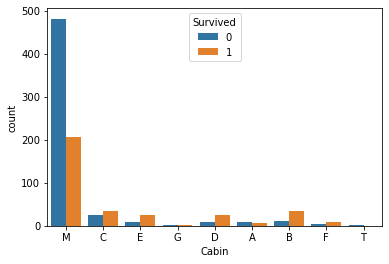

In [36]:
sns.countplot(data=train,   # 사용할 데이터 지정
             x = 'Cabin',   # x축에서 범주로 사용할 컬럼 지정
             hue = 'Survived')   # 각 범주를 분리할 컬럼 지정

- B,D 같은 경우는 살아남기에 괜찮은 객실일 수 있다.
- M 같은 경우는 죽은 사람들의 비율이 높다.
- 'Cabin' 어느정도 활용할 법 해보인다.

#### Pclass 시각화

<AxesSubplot:xlabel='Pclass', ylabel='count'>

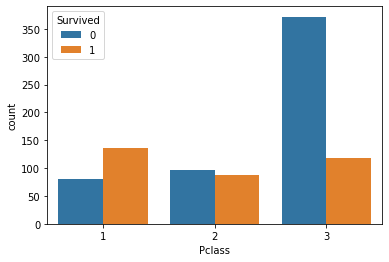

In [37]:
sns.countplot(data=train,   # 사용할 데이터 지정
             x = 'Pclass',   # x축에서 범주로 사용할 컬럼 지정
             hue = 'Survived')   # 각 범주를 분리할 컬럼 지정

- 1등급은 산 사람의 비율이 좀 더 높고, 3등급은 죽은 사람의 비율이 좀 더 높다.

#### Cabin  & Pclass 시각화


<AxesSubplot:xlabel='Cabin', ylabel='count'>

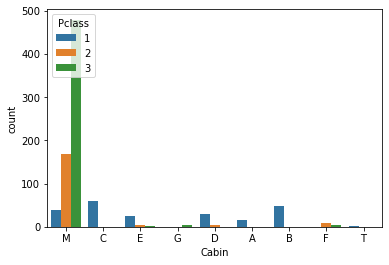

In [38]:
sns.countplot(data=train,   # 사용할 데이터 지정
             x = 'Cabin',   # x축에서 범주로 사용할 컬럼 지정
             hue = 'Pclass')   # 각 범주를 분리할 컬럼 지정

- M 자체가 생존에 영향을 주었다기보다는 M에 3등급이 많아서 죽은 사람이 더 많지 않았을까?
- Cabin 보다는 Pclass가 생존과 더 높은 상관관계를 갖지 않았을까?

### 수치형 데이터 시각화
- 수치형 데이터는 반대로 range가 없고(최대값과 최소값이 없고) 사잇값들이 얼마든지 많이 등장할 수 있다.
- 수치형 데이터는 데이터 자체를 보기보다는 구간을 나눠서 보면 insight를 얻는데 도움이 된다.
- histogram 자주 사용(수치형 데이터를 구간화 해서 구간을 종합해줌)
- 커널밀도 추정 그래프 : (정규분포도 비슷)
- 산포도 scatter도 씀

#### matplotlib 함수 

In [39]:
import matplotlib.pyplot as plt

(array([ 50.,  33., 206., 286., 132.,  95.,  50.,  26.,  11.,   2.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <BarContainer object of 10 artists>)

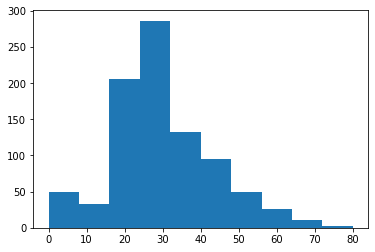

In [40]:
plt.hist(train['Age'], bins=10)   #(구간을, 10개로 구분해서)

#### seaborn histplot 함수

<AxesSubplot:xlabel='Age', ylabel='Count'>

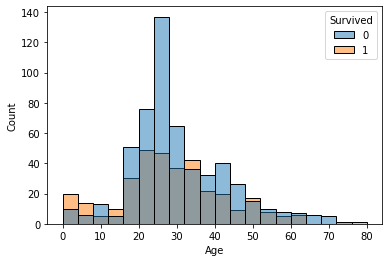

In [41]:
sns.histplot(data=train, x=train['Age'], bins=20, hue='Survived')

- 20대 중~후반의 사람들이 죽은 비율이 높다. 
- 10살 미만의 사람들이 산 비율이 약간 높다.

#### 커널밀도 추정 그래프

<AxesSubplot:xlabel='Fare', ylabel='Density'>

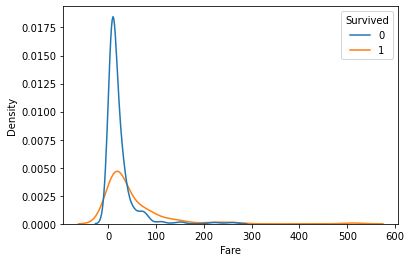

In [42]:
#요금 데이터 시각화
sns.kdeplot(data=train, x=train['Fare'], hue=train['Survived'])

#추정 그래프이기 때문에 0미만의 값이 있을 수 있다고 추정하는 것임(실제 존재하지 않더라도 보여짐)

- 0~40달러 사이의 사람은 죽은 사람의 밀도가 높다.
- 200달러 이상의 사람은 산 사람의 밀도 아주 살짝 높다.

#### 바이올린 플롯 (커널밀도 추정그래프 + 박스 플롯) 시각화
-  박스 플롯 : 중앙값과 이상치를 한눈에 보기 좋다

<AxesSubplot:xlabel='Sex', ylabel='Age'>

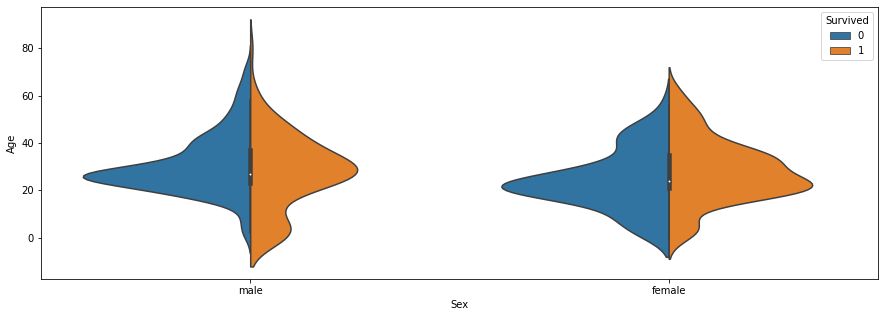

In [43]:
plt.figure(figsize=(15,5))   #그래프의 가로,세로 크시 설정
sns.violinplot(data=train,   #사용할 데이터
               x='Sex',
               y='Age',
               hue='Survived',
               split=True)

#### 기타 시각화 그래프
- heatmap : 상관관계 계수 시각화 할 때
- pairplot : 분포확인

### 텍스트 데이터
- 비정형 데이터는 단어중심 시각화 
- wordcloud (google에 wordcloud 생성기 검색하면 나오기도 함)
- 빈도기반의 시각화 활용가능

# 특성공학(Feature Engineering)
- fearture에서 유의미한 컬럼을 추출하거나 병합하는 행위

In [44]:
train.columns


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## fearture 병합


### SibSP와 Parch 병합하기

In [45]:
#SibSp : 형제나 배우자
#Parch : 부모 자식
#가족이라는 개념으로 병합가능

<AxesSubplot:xlabel='SibSp', ylabel='count'>

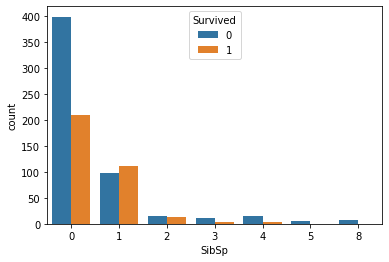

In [46]:
sns.countplot(data=train,
             x='SibSp',
             hue='Survived')

<AxesSubplot:xlabel='Parch', ylabel='count'>

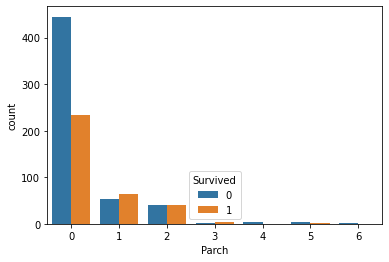

In [47]:
sns.countplot(data=train,
             x='Parch',
             hue='Survived')

In [48]:
#형제, 배우자, 부모, 자식을 모두 합쳐 가족이라는 새로운 칼럼생성
train['Family'] = train['SibSp'] + train['Parch']

<AxesSubplot:xlabel='Family', ylabel='count'>

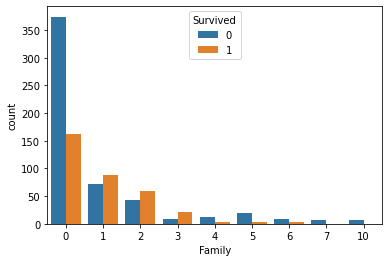

In [49]:
sns.countplot(data=train,
             x='Family',
             hue='Survived')

- 1~3명을 기준으로 구간이 반전되는 것이 보인다. 0명이면 오히려 죽은 사람이 많고 4명이상은 가족이 많아도 죽은 사람의 비율이 높다

- 모든 가족의 숫자를 범주형으로 바꾼다
- 혼자온 사람 (가족0명)
- 소규모 가족 (1~3명의 가족)
- 대규모 가족 (4명이상의 가족)
- 수치형 데이터를 이런 범주로 나누게 되면 나의 의도를 좀 더 노골적으로 주입할 수 있게 된다.

#### cut 함수를 이용한 Binning(수치 -> 범주)
- Binning은 수치데이터들의 사소한 관찰 오류를 어느정도 상쇄시켜준다 (모델의 단순화를 유도, 과대적합 방지?)

In [50]:
#cut함수 사용하기 위해 구간정보 필요
bins = [-1,0,3,20] #데이터를 잘라낼 구간 정보 설정  
# [앞 두개로 첫번째 구간 설정, 두번째 구간에 대한 정보는 두번째 요소와 세번째 요소 사이, 
# 세번째 구간에 대한 정보는 세번째 요소와 네번째 요소 사이 이런 방식으로 쭉쭉쭉] 
# 주의! 오른쪽에 있는 값 까지 포함하는 [초과,이하] 관계 (시작값이 앞에 것 보다 +1로 설정되어있음!!)

In [51]:
#cut 함수를 사용하기 위해 각 구간별로 라벨링 될 범주를 넣어줘야함
labels = ['Alone', 'Small', 'Large'] #구간별 범주 이름

In [52]:
cut_result = pd.cut(x=train['Family'],   #구간화할 데이터 설정
                    bins=bins,   #위에서 정의한 구간 범위 설정
                    labels=labels)   #위에서 정의한 구간 범주 이름 설정

In [53]:
cut_result

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: Family, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

In [54]:
#열추가로 수치데이터를 범주화 한 값을 추가해주기
train['Family_cat'] = cut_result

<AxesSubplot:xlabel='Family_cat', ylabel='count'>

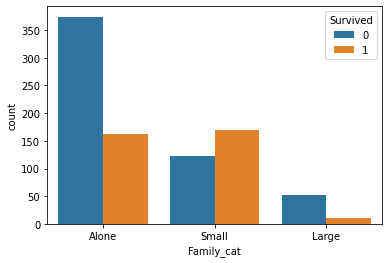

In [55]:
sns.countplot(data=train,
            x='Family_cat',
            hue='Survived')

In [56]:
#테스트 데이터도 만듬
test['Family'] = test['SibSp'] + test['Parch']
bins = [-1,0,3,20]
labels = ['Alone', 'Small', 'Large']
cut_result = pd.cut(x=test['Family'],  
                    bins=bins,   
                    labels=labels)  

In [57]:
test['Family_cat'] = cut_result

### 비정형 데이터 다루기(Name) 
- 비정형 데이터 : 틀이 없는 데이터, 정형화 되지 않는 데이터
- (음성, 이미지, 리뷰와 같은 텍스트 데이터)
- 학습시키기 위해서는 정해진 포멧으로 정형화 시켜줘야함
- (타이타닉에서 비정형 데이터는 이름 데이터)
- 병합하지 않고 새로운 데이터 뽑아내기

In [58]:
train['Name']
#사람 이름 그 자체보다는 이름 안에 들어 있는 호칭으로 정형화 가능

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

- 이름 중간에 호칭을 추출해서 사용해보자.
- apply 함수는 사용자 정의 함수를 데이터에 적용시킬 수 있음
- 우리가 원하면 행방향, 열방향으로 적용시킬 수 있음 
- Name은 지금 시리즈 데이터 타입임(1차원 데이터)-> 열방향이 없어서 apply 쉽게 적용 가능

In [59]:
#def split_title(row):
#    if row[('Mr.' in row) or ('Miss.' in row)]:
#        return row

In [60]:
def split_title(row):
        return row.split(',')[1].split('.')[0].strip()
    #공백이 들어갈 수 있으니 양쪽 공백을 없애주는 strip함수 넣어야함
    #문자열 중간의 공백은 단어들의 의미를 살리기 위해 지우지 않음
    #문자열 맨 우측 맨 좌측 공백은 의미가 없는 경우가 많기 때문에 지움

In [61]:
train['Title'] = train['Name'].apply(split_title)
test['Title'] = test['Name'].apply(split_title)

#### countplot 시각화

<AxesSubplot:xlabel='Title', ylabel='count'>

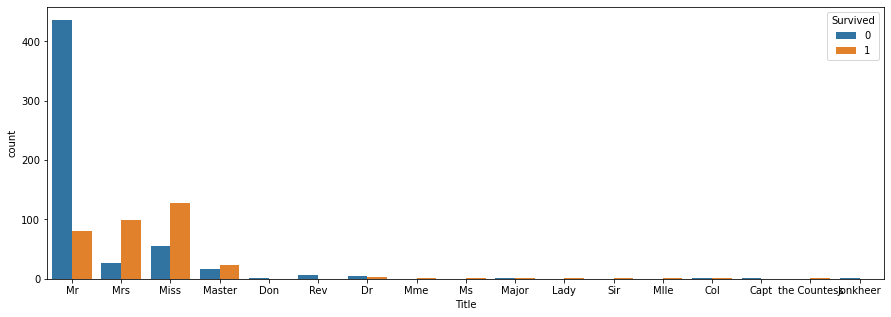

In [62]:
plt.figure(figsize=(15,5))   #그림판의 가로,세로 크기 조정(inch단위)
sns.countplot(data=train,
             x='Title',
             hue='Survived')

In [63]:
# 일부 수치가 적은 호칭을 Other로 통일하자.
# (짜잘한 범주들이 많으면 복잡도가 높아져서 좋지 않기 때문)
# Mr, Mrs, Miss, Master, Rev, Other

In [64]:
# map 함수 이용하기 (데이터 치환시 사용)
#(맵 함수는 치환할 데이터를 딕셔너리 형태로 넣어주는 함수, 딕셔너리가 정의하지 않는 것은 결측치로 반환한다.)

title_dic = {
    "Mr":"Mr",
    "Mrs":"Mrs",
    "Miss":"Miss",
    "Master":"Master",
    "Rev":"Rev"}  #살릴 것만 표현하고, 나머지 결측치를 다 채우는 방법으로 나머지 Other로 채우기

In [65]:
title_mapping = train['Title'].map(title_dic)
title_mapping[title_mapping.isnull()]

PassengerId
31     NaN
246    NaN
318    NaN
370    NaN
399    NaN
444    NaN
450    NaN
537    NaN
557    NaN
600    NaN
633    NaN
642    NaN
648    NaN
661    NaN
695    NaN
711    NaN
746    NaN
760    NaN
767    NaN
797    NaN
823    NaN
Name: Title, dtype: object

In [66]:
#결측치 채우기
train['Title'] =  title_mapping.fillna("Other")

In [67]:
#test 적용
title_mapping = test['Title'].map(title_dic)
title_mapping[title_mapping.isnull()]

PassengerId
980     NaN
1023    NaN
1094    NaN
1185    NaN
1306    NaN
Name: Title, dtype: object

In [68]:
test['Title'] =  title_mapping.fillna("Other")

In [69]:
print(train['Title'].unique())
print(test['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Other' 'Rev']
['Mr' 'Mrs' 'Miss' 'Master' 'Other' 'Rev']


### drop 함수 활용하여 사용하지 않을 컬럼 정리
- drop은 행 중심 작동이 디폴트

In [70]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family', 'Family_cat', 'Title'],
      dtype='object')

In [71]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Family', 'Family_cat', 'Title'],
      dtype='object')

In [72]:
train.drop(['Name', "SibSp", 'Parch', 'Ticket'], axis=1, inplace=True)  #inplace=True는 원본 데이터에 변경된 내용 적용

In [73]:
test.drop(['Name', "SibSp", 'Parch', 'Ticket'], axis=1, inplace=True)

In [74]:
print("train columns :", train.columns)
print("test columns :", test.columns)

train columns : Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Family', 'Family_cat', 'Title'],
      dtype='object')
test columns : Index(['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Family',
       'Family_cat', 'Title'],
      dtype='object')


# 모델링
- 인코딩이 필요함(문자형태 데이터는 학습에 쓸 수 없기 때문에 숫자형태로 변환)
     1. label encoding : 순서가 있는 범주형 데이터를 정수로 전환
     2. one-hot-encoding : 순서가 없는 범주형 데이터에 라벨링 (이진수로 뽑아주는 것 아님 그냥 0or1로 뽑아주는 것임) 
         - 0인 데이터는 더해도 곱해도 0, 1인 데이터만 가치 있게 되고 모든 범주형은 다 1이기 때문에 동등한 위상(?)
- 특성 선택(feature selection)
    - 상관계수 활용
- 모델선택 및 하이퍼파라미터 튜닝
- 모델 학습 및 평가

## 인코딩

In [75]:
# 인코딩할 특성 탐색
train.columns
# 성별: 순서x
#객실: 순서x
#탑승항: 순서x 
#Family_cat: 순서x
#호칭: 순서x

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Family', 'Family_cat', 'Title'],
      dtype='object')

In [76]:
# 인코딩할 컬럼명만 선택
categorical_features = ['Sex','Cabin','Embarked','Family_cat','Title']

In [77]:
# 원핫인코딩 함수 pd.get_dummies()
# 종류만큼 컬럼을 늘리고 해당 종류에 속하면 1 속하지 않으면 0을 매겨줌
#pd.get_dummies(train['Sex'])

In [78]:
# 반복문으로 인코딩하기
# prefix=feature_name  <- 어느컬럼에서 나왔는지 알려주는 용도
for feature_name in categorical_features:
    one_hot = pd.get_dummies(train[feature_name], prefix=feature_name)
    train = pd.concat([train,one_hot], axis=1)   # 기존 데이터 끝에 one_hot을 붙여서 다시 train에 담아주기
    train.drop(feature_name, axis=1, inplace=True)   # 인코딩한 칼럼 삭제

In [79]:
train.head()

,Survived,Pclass,Age,Fare,Family,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,...,Embarked_S,Family_cat_Alone,Family_cat_Small,Family_cat_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22,7.2500,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,1,1,38,71.2833,1,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,1,3,26,7.9250,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
4,1,1,35,53.1000,1,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
5,0,3,35,8.0500,0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,0


In [80]:
#테스트 데이터에도 적용
for feature_name in categorical_features:
    one_hot = pd.get_dummies(test[feature_name], prefix=feature_name)
    test = pd.concat([test,one_hot], axis=1)   
    test.drop(feature_name, axis=1, inplace=True) 

In [81]:
test.head()

,Pclass,Age,Fare,Family,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Embarked_S,Family_cat_Alone,Family_cat_Small,Family_cat_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34,7,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
893,3,47,7,1,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
894,2,62,9,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
895,3,27,8,0,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
896,3,22,12,2,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [82]:
train.shape, test.shape
#원래는 컬럼차이가 라벨데이터 1개여야 하는데 2개면 인코딩 과정에서 뭔가 달라졌다는 뜻
#train컬럼과 test컬럼 차이 집합으로 알아볼 수 있다.

((891, 28), (418, 26))

In [83]:
#집합연산(set)으로 다른 컬럼을 확인해보자.  
#집합은 중괄호로 시작하는데 딕셔너리와 다르게 세트가 아니라 단일요소
set(train.columns) - set(test.columns)

{'Cabin_T', 'Survived'}

In [84]:
#train데이터와 test데이터가 가진 범주형 데이터의 가지수가 다른 경우 다르게 나올 수 있다.
#훈련용 데이터에는 Cabin에 T가 존재했지만
#테스트 데이터는 Cabin에 T가 없어서 one-hot 인코딩 시 칼럼이 안만들어졌다.
#해결방법: 테스트 데이터 끝에 Cabin_T를 추가 + 컬럼 정렬 

In [85]:
test['Cabin_T'] = 0

In [86]:
test.shape

(418, 27)

In [87]:
# 훈련용 데이터와 테스트 데이터의 인덱스 순서가 다르기 때문에 컬럼 정렬해주기
train.sort_index(axis=1, inplace=True)
test.sort_index(axis=1, inplace=True)
# 라벨 데이터는 나중에 따로 분리할 거라서 상관없음

In [88]:
train.columns

Index(['Age', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family', 'Family_cat_Alone', 'Family_cat_Large',
       'Family_cat_Small', 'Fare', 'Pclass', 'Sex_female', 'Sex_male',
       'Survived', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Other', 'Title_Rev'],
      dtype='object')

In [89]:
test.columns

Index(['Age', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family', 'Family_cat_Alone', 'Family_cat_Large',
       'Family_cat_Small', 'Fare', 'Pclass', 'Sex_female', 'Sex_male',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other',
       'Title_Rev'],
      dtype='object')

## 특성선택
- 예측결과에 영향을 줄 특성들을 골라본다.
- Family와 Family_cat이 비슷한 특성이기 때문에 선택해보자.

### 문제와 답 만들기

In [90]:
X_train = train.drop(['Survived', 'Family'], axis=1)
y_train = train.Survived   #판다스에서 컬럼 하나만 가져올 땐 그냥 .컬럼이름 입력하면 가져와진다

X_test = test.drop('Family', axis=1)

In [91]:
X_train.shape, y_train.shape

((891, 26), (891,))

In [92]:
X_test.shape

(418, 26)

## 학습
- KNN모델과 DecisionTree모델 활용

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [94]:
# 모델 생성
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

In [95]:
# 모델 학습
knn_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [96]:
# 모델 예측
knn_pre = knn_model.predict(X_test)
tree_pre = tree_model.predict(X_test)

In [97]:
# 정답파일 만들기
submission = pd.read_csv('./data/gender_submission.csv')

In [98]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [99]:
submission['Survived'] = knn_pre

In [100]:
# 데이터 프레임을 csv파일로 저장
submission.to_csv('./data/knn_pre.csv', index=False)  #index=False 하지 않으면 인덱스도 하나의 컬럼으로 저장됨

In [101]:
submission['Survived'] = tree_pre
submission.to_csv('./data/knn_tree.csv', index=False)

## 데이터 스케일링(교재 122p)
    - 특성들의 범위를 정규화해주는 작업
    - 단위가 다른 두 데이터의 스케일을 어느 정도 맞춰주는 작업 
    - knn, svm, Neural network모델, Clustering 모델 등이 스케일링의 영향을 많이 받음
    
- 데이터 스케일링 종류
    - StandardScaler: 변수의 평균, 표준편차를 이용해서 정규분포 형태로 반환(평균0, 분산1), 이상치에 민감하게 반응
    - RobustScaler: 변수의 사분위수를 이용해 반환, 이상치가 있는 데이터 변환시 사용 가능
    - MinMaxScaler: 최대값과 최소값을 이용해 (0~1사이값으로 반환) 변환, 이상치에 민감하게 반응
    - Normalizer: 특성 벡터의 길이가 1이 되도록 조정(행마다 정규화 진행)
    - (하는 방법은 같고 그냥 글자만 바꿔주면 됨)
        - 벡터 길이,크기는 상관없고 데이터의 방향(각도)만 중요할 때 사용 (추천 시스템에서 많이 사용)
        
- 데이터 스케일링 시 주의사항
    - 훈련세트와 테스트세트에 같은 변환을 적용해야한다
    - 훈련세트를 기준으로 스케일링해야한다. 기준을 맞추줘야하기 때문

### 데이터 스케일링
- 각 feature의 스케일이 다르면 예측결과가 안좋은 경우가 있다.
- KNN, SVM, 신경망모델, Clustering 모델 등

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
# 스케일러 생성 (평균과 표준편차 이용 데이터 레인지 조정해 스케일 맞춤)
std_scaler = StandardScaler()

In [104]:
# 기준값 생성 (평균, 표준편차) 
std_scaler.fit(X_train[['Fare']])

StandardScaler()

In [105]:
# 데이터 변형
scaled_fare = std_scaler.transform(X_train[['Fare']])
#스케일러에 들어갈 땐 대괄호 두번 쳐서 2차원 으로 만들어 줘야한다.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

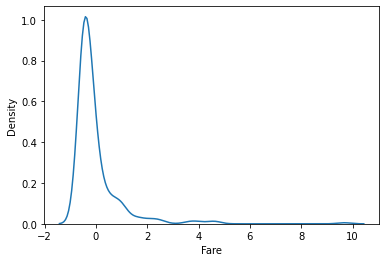

In [106]:
X_train['Fare'] = scaled_fare
sns.kdeplot(data=X_train, x='Fare')

In [107]:
scaled_fare = std_scaler.transform(X_test[['Fare']])
X_test['Fare'] = scaled_fare

In [108]:
knn_model2 = KNeighborsClassifier()
knn_model2.fit(X_train, y_train)
knn_pre2 = knn_model2.predict(X_test)
submission['Survived'] = knn_pre
submission.to_csv('./data/knn_pre2.csv', index=False)

## 하이퍼파라미터 튜닝
- KNN모델과 DecisionTree 모델을 최적화 해보자.
- KNN : 이웃 숫자
- Tree : 나무의 깊이, 리프노드의 갯수, 한 리프노드에 들어갈 샘플 수 등

- 실전에서 데이터 분류 (학습(train)/검증(validation)/평가(test))
- 하이퍼 파라미터 튜닝 시 특정 테스트 데이터로만 평가하면 그 테스트 데이터에만 맞는 튜닝이 될 수 있어서 검증 데이터를 하나 더 나눈다
    - train: 훈련시키는 데이터
    - validation: 훈련데이터 검증하는 데이터
    - test: 마지막에 평가받는 데이터
- 데이터를 7:3으로 쪼갠다 이때 3이 평가용 데이터다 
- 7에서 다시 7:3으로 쪼개서 훈련용과 검증용으로 나눈다
- 튜닝할 때만 훈련용과 검증용을 나누지 나중에 다시 학습해서 올릴 때 

### 모델 최적화를 위해 검증데이터 셋을 만들자

### KNN  튜닝
- KNN 이웃수 반복문으로 찾기

In [109]:
from sklearn.model_selection import train_test_split
X_train2, X_val, y_train2,y_val = train_test_split(X_train,y_train,
                                                  test_size =0.3,
                                                  random_state=719)

In [110]:
X_train2.shape, y_train2.shape

((623, 26), (623,))

In [111]:
X_val.shape, y_val.shape

((268, 26), (268,))

In [112]:
knn_model3 = KNeighborsClassifier()

In [113]:
# 이웃의 수마다의 정확도
train_acc = []
val_acc = []

#사용할 이웃의 범위 값들을 정의
neighbor = range(1,20)

for n in neighbor :
    knn_model3 = KNeighborsClassifier(n_neighbors=n)
    knn_model3.fit(X_train2, y_train2)
    
    train_acc.append(knn_model3.score(X_train2, y_train2))  #모델에 한번 학습시키고 나면 기존에 공부했던 자료
    val_acc.append(knn_model3.score(X_val, y_val))

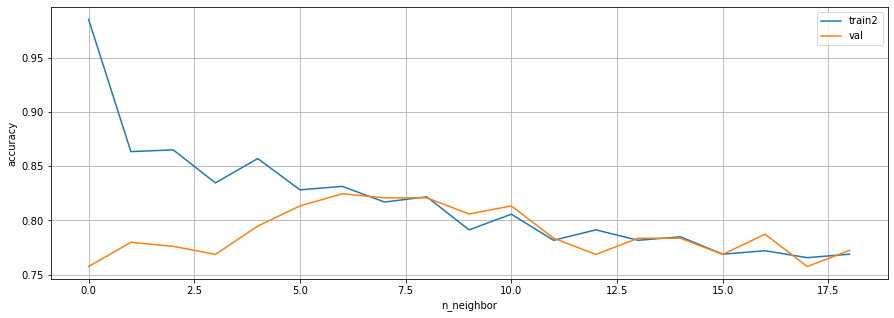

In [114]:
x = train_acc
y = val_acc

plt.figure(figsize=(15,5))
plt.plot(x, label="train2")
plt.plot(y, label="val")
plt.xlabel("n_neighbor")
plt.ylabel("accuracy")
plt.legend()
plt.grid()

In [115]:
#test 데이터의 하락 시점을 일반화 시점으로 기준 잡는다
#knn은 유일하게 복잡도 그림이 반대로 나오게 된다.
#이웃의 수가 적으면 물어볼 사람이 적어서 그 이웃의 특성에 과대적함 (복잡도 높음) 되기 때문이다
#이웃의 수가 많으면 물어볼 사람이 많고 복잡도는 낮아지게 된다.

- tree max depth 이용

In [116]:
tree_model2 = DecisionTreeClassifier()

In [117]:
train_score = []   #훈련데이터의 점수가 들어갈 리스트
test_score = []   #검증데이터의 점수가 들어갈 리스트

for n in range(1,20):
    #이웃을 1~19개까지 변경하면서 모델 생성
    model = KNeighborsClassifier(n_neighbors=n)
    #모델 학습
    model.fit(X_train2, y_train2)
    #훈련데이터에 대한 점수 누적
    train_score.append(model.score(X_train2, y_train2))
    #검증데이터에 대한 점수 누적
    test_score.append(model.score(X_val,y_val))

### 교차검증
- 학습-평가데이터 나누기를 여러 번 반복하여 일반화 에러를 평가하는 방법
- K-fold cross-validation
    - 가지고 있는 훈련 데이터를 여러개로 쪼갠다
    - 쪼갠 것 중 1개를 검증 데이터 나머지를 훈련 데이터로 사용
    - 쪼갠 수만큼 검증 데이터를 바꿔가며 평가

#### Decision Tree 튜닝

In [118]:
# 교차검증함수 (데이터 셋을 여러개 쓴 것과 같은 효과를 누릴 수 있음)
from sklearn.model_selection import cross_val_score

Text(0.5, 0, 'max_depth')

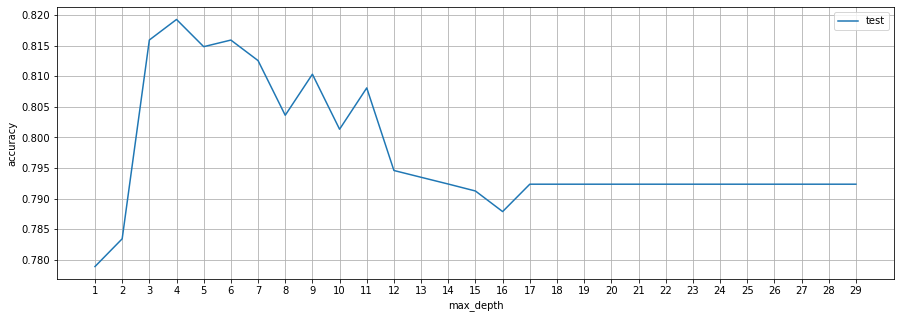

In [119]:
test_score = []
for d in range(1,30):
    model = DecisionTreeClassifier(max_depth=d, random_state=720)
    result = cross_val_score(model, X_train, y_train, cv=5)   # cv = 몇번 쪼개서 평가할거냐
    test_score.append(result.mean())
    
plt.figure(figsize=(15,5))
plt.plot(range(1,30), test_score, label='test')
plt.xticks(range(1,30))
plt.grid()
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('max_depth')
    

# 앙상블(210p~250p) (파라미터가 많다)
- 보팅(voting): 서로다른 알고리즘 모델 여러개를 이용해서 투표로 예측 결과를 만들어 낸다
    - 하드보팅: 모델의 최종 예측결과로 투표
    - 소프트보팅: 모델의 확률 결과로 투표
- 배깅(bagging): 같은 알고리즘 모델 여러개 이용해서 투표 진행 (데이터의 다양성 노림)
    - 여러개의 모델들이 학습할 때 다른 의견이 나올 수 있도록 부트 스트래핑 작업을 한다.
    - 매번 모델이 학습할 때 마다 랜덤하게 데이터를 추출하되, 중복된 추출을 허용한다.
    - DecisionTree의 배깅 모델 : RandomForest 많이 이용 
- 부스팅(boosting): 같은 알고리즘 모델 여러개 이용해서 투표 진행
    - 이전 모델이 잘못 학슨한 결과를 다음 모델이 반영해서 학습하도록 하는 기법
    - 학습 진행이 순차적으로 일어나기 때문에 상대적으로 속도가 느리다 (그래서 모델 간단하게 만듬)

## Random Forest(랜덤 포레스트)

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rf_model = RandomForestClassifier(n_estimators=100,   # 배깅할 모델 갯수 
                                  max_features=0.6,   # 각 모델이 랜덤하게 사용할 특성
                                  max_depth=8,   # 각 모델의 최대 깊이
                                  min_samples_leaf=10,   # 리프노드의 최소 샘플 수
                                  random_state=721   # 난수고정
                                  )

In [122]:
rf_rs = cross_val_score(rf_model,X_train,y_train,cv=5)
rf_rs

array([0.81564246, 0.80898876, 0.84831461, 0.79775281, 0.83707865])

### 그리드 서치 
- 앙상블 모델의 경우 하이퍼 파라미터 수가 엄청 많다.
- 각 파라미터를 독립적으로 튜닝하는 건 불가능하다.(서로 영향을 받는 관계이기 때문에)
- 많은 양의 파라미터를 동시에 튜닝하기 위한 함수로 그리드서치를 지원한다.

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
# 탐색하고 싶은 하이퍼파라미터 조합을 딕셔너리로 생성
param_grid = {
    'max_depth' : [5, 10, 15, 20],    # 키값으로 설정하고 싶은 파라미터 : 밸류값은 리스트로
    'n_estimators' : [100, 150, 200, 250],
    'max_features' : [0.5, 0.7],
    'min_samples_leaf' : [10, 20, 25]
}

In [125]:
# 튜닝할 모델, 사용할 파라미터, 교차검증 횟수 3가지를 파라미터로 넣어주면 됨
model = RandomForestClassifier(random_state=721)
grid = GridSearchCV(model, param_grid, cv=3, n_jobs=-1) 

In [126]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=721),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [0.5, 0.7],
                         'min_samples_leaf': [10, 20, 25],
                         'n_estimators': [100, 150, 200, 250]})

In [127]:
#최고의 조합 확인
grid.best_estimator_

RandomForestClassifier(max_depth=5, max_features=0.7, min_samples_leaf=10,
                       random_state=721)

In [128]:
# 최고 점수 확인
grid.best_sco4

0.8338945005611672

In [129]:
# 최고 조합으로 학습완료된 모델
best_model = grid.best_estimator_

In [130]:
pre = best_model.predict(X_test)

In [131]:
submission['Survivied'] = pre
submission.to_csv("./data/rf_pre.csv", index=False)

# 모델 평가
- KNN이웃 수 : 7
- DecisionTree의 최대 깊이 : 4


In [132]:
final_knn = KNeighborsClassifier(n_neighbors=7)
final_tree = DecisionTreeClassifier(max_depth=4, random_state=720)

In [133]:
final_knn.fit(X_train,y_train)
final_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=720)

In [134]:
knn_pre = final_knn.predict(X_test)
tree_pre = final_tree.predict(X_test)

## 성능개선을 위해 고려해볼 사항
1. 특성(feature)선택
2. 추가 데이터 확보
3. 전처리 작업 변경(결측치, 특성공학, 스케일링 등)
4. 모델변경 - 앙상블(모델을 여러개 엮어서 쓰는 기법)

## boosting 라이브러리 설치

In [135]:
!pip install xgboost

In [136]:
!pip install lightgbm

In [137]:
from xgboost import XGBClassifier

In [138]:
xgb_model = XGBClassifier(booster='gbtree',   # 모델의 종류 선택
                         n_estimators=100,   # 앙상블 모델 갯수
                         learning_rate=0.1,   # 학습률
                         max_depth = 4,   # 부스팅 할 땐 최대깊이 일반적으로 깊게 설정x
                         gamma = 0.2,   # 값을 키우면 모데 단순, 작아지면 모델 복잡
                         #lamda, alpha 선형 모델 베이스 GB리니어 일때 쓰는 것
                         )